# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [ ]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [5]:
# DDPG function, code from Udacity

from collections import deque
import torch

def mddpg(n_episodes=550, max_t=1000, print_every=100): # Enter max_t value
    """Deep Deterministic Policy Gradient (DDPG)
    
    Params
    ======
        n_episodes  (int)   : maximum number of training episodes
        max_t       (int)   : maximum number of timesteps per episode
        print_every (int)   : interval to display results

    """
    episode_scores = []                            # list of max scores from each episode
    moving_avgs = []                               # list of moving averages
    scores_window = deque(maxlen=100)              # scores from most recent 100 episodes
    
    for i_episode in range(1, n_episodes+1):
        #reset environment
        env_info = env.reset(train_mode=True)[brain_name]
        #get current state for each agent  
        states = env_info.vector_observations
        # initialize score for each agent
        scores = np.zeros(num_agents)                           
        for t in range(max_t):
            agent.reset()
            # select an action
            actions = agent.act(states, add_noise=True)
            # send actions to environment
            env_info = env.step(actions)[brain_name]            
            # get next state
            next_states = env_info.vector_observations
            # get the reward
            rewards = env_info.rewards
            #check episode is finished
            dones = env_info.local_done                          
            # storing experience to replay buffer, perform learning step at defined interval
            # calculating the state, action and reward for each agent
            for i in range(0, num_agents):
                agent.step(states[i], actions[i], rewards[i], next_states[i], dones[i], t)
                
            states = next_states
            # add scores to the score list
            scores += rewards
                
                # exit loop when episode ends
            if np.any(dones):                                   
                break
                
        #print(scores)
        # save the maximum score for each episode
        episode_scores.append(np.max(scores))
        
        # add score to calculate the mean of last 100 episodes
        scores_window.append(np.max(scores))
        
        # calculate and save moving average over the last 100 episodes
        moving_avgs.append(np.mean(scores_window))   
        
        print('\rEpisode {} \tAvg over 100 episodes: {:.3f} \tMax Score: {:.3f}'.format(i_episode, moving_avgs[-1], np.max(episode_scores)), end="")
        
        if i_episode % print_every == 0:
            print('\rEpisode {} \tAvg over 100 episodes: {:.3f} \tMax Score: {:.3f}'.format(i_episode, moving_avgs[-1], np.max(episode_scores)))
        
                  
        if moving_avgs[-1] >= 0.5 and i_episode >= 100:
                  print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, moving_avgs[-1]))
                  torch.save(agent.actor_local.state_dict(), 'checkpoint_actor4.pth')
                  torch.save(agent.critic_local.state_dict(), 'checkpoint_critic4.pth')
                  break
            
    return episode_scores, moving_avgs

In [6]:
from mddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=9, buffer_size=int(2e6), batch_size=512, tau=0.009, lr_actor=0.0007, lr_critic=0.0007, weight_decay=0)


### Best score

In [7]:
from workspace_utils import active_session

with active_session():
    scores, moving_avgs = mddpg()

Episode 100 	Avg over 100 episodes: 0.014 	Max Score: 0.100
Episode 200 	Avg over 100 episodes: 0.157 	Max Score: 1.400
Episode 251 	Avg over 100 episodes: 0.500 	Max Score: 2.600
Environment solved in 151 episodes!	Average Score: 0.50


### Trials

In [7]:
#agent = Agent(state_size=state_size, action_size=action_size, random_seed=9, buffer_size=int(2e6), batch_size=512, tau=0.008, lr_actor=0.0007, lr_critic=0.0007, weight_decay=0)

from workspace_utils import active_session

with active_session():
    scores, moving_avgs = mddpg()

Episode 100 	Avg over 100 episodes: 0.010 	Max Score: 0.100
Episode 200 	Avg over 100 episodes: 0.066 	Max Score: 0.100
Episode 300 	Avg over 100 episodes: 0.353 	Max Score: 2.500
Episode 317 	Avg over 100 episodes: 0.501 	Max Score: 2.600
Environment solved in 217 episodes!	Average Score: 0.50


In [7]:
#agent = Agent(state_size=state_size, action_size=action_size, random_seed=9, buffer_size=int(2e6), batch_size=512, tau=0.006, lr_actor=0.0008, lr_critic=0.0008, weight_decay=0)

from workspace_utils import active_session

with active_session():
    scores, moving_avgs = mddpg()

Episode 100 	Avg over 100 episodes: 0.009 	Max Score: 0.300
Episode 200 	Avg over 100 episodes: 0.052 	Max Score: 0.300
Episode 300 	Avg over 100 episodes: 0.096 	Max Score: 0.300
Episode 400 	Avg over 100 episodes: 0.295 	Max Score: 2.600
Episode 452 	Avg over 100 episodes: 0.503 	Max Score: 2.600
Environment solved in 352 episodes!	Average Score: 0.50


### Plotting rewards

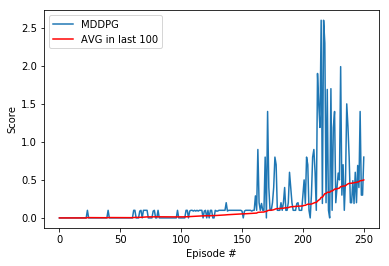

In [9]:
# Plot from best environment solved in 151 episodes!
import matplotlib.pyplot as plt
%matplotlib inline
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MDDPG')
plt.plot(np.arange(len(scores)), moving_avgs, c='r', label='AVG in last 100')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

## Testing the agent

In [5]:
from unityagents import UnityEnvironment
import numpy as np
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]

Number of agents: 2
Size of each action: 2


In [7]:
from mddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=9, buffer_size=int(2e6), batch_size=512, tau=0.005, lr_actor=0.0008, lr_critic=0.0008, weight_decay=0)


In [8]:
#loading the checkpoint
import torch
agent.actor_local.load_state_dict(torch.load('checkpoint_actor4.pth',map_location='cpu'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic4.pth',map_location='cpu'))

In [11]:
#chpoint4
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(states, add_noise=False)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.3450000053271651
Total score (averaged over agents) this episode: 0.29500000458210707
Total score (averaged over agents) this episode: 0.4950000075623393
Total score (averaged over agents) this episode: 0.29500000458210707
Total score (averaged over agents) this episode: 0.29500000458210707
